# 0.0 - Carregando os dados

Importamos as bibliotecas necessárias para o notebook e carregamos a base de dados tratada

In [2]:
import pandas as pd
import pickle
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [3]:
df = pd.read_csv('../data/data_clean.csv', sep=',')
print(df.shape)
df.head()

(43400, 11)


gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1   3.0             0              0             0          4   
1       1  58.0             1              0             1          2   
2       0   8.0             0              0             0          2   
3       0  70.0             0              0             1          2   
4       1  14.0             0              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0              95.12  18.0               1       0  
1               1              87.96  39.2               1       0  
2               1             110.89  17.6               1       0  
3               0              69.04  35.9               0       0  
4               0             161.28  19.1               1       0

In [4]:
df.describe()

gender           age  hypertension  heart_disease  ever_married  \
count  43400.000000  43400.000000  43400.000000   43400.000000  43400.000000   
mean       0.408894     42.217894      0.093571       0.047512      0.643733   
std        0.492151     22.519649      0.291235       0.212733      0.478901   
min        0.000000      0.080000      0.000000       0.000000      0.000000   
25%        0.000000     24.000000      0.000000       0.000000      0.000000   
50%        0.000000     44.000000      0.000000       0.000000      1.000000   
75%        1.000000     60.000000      0.000000       0.000000      1.000000   
max        2.000000     82.000000      1.000000       1.000000      1.000000   

          work_type  Residence_type  avg_glucose_level           bmi  \
count  43400.000000    43400.000000       43400.000000  43400.000000   
mean       2.185438        0.501290         104.482750     28.605038   
std        1.093158        0.500004          43.111751      7.638023   
min        0.000000        0.000000          55.000000     10.100000   
25%        2.000000        0.000000          77.540000     23.400000   
50%        2.000000        1.000000          91.580000     28.100000   
75%        3.000000        1.000000         112.070000     32.600000   
max        4.000000        1.000000         291.050000     97.600000   

       smoking_status        stroke  
count    43400.000000  43400.000000  
mean         0.978548      0.018041  
std          0.568678      0.133103  
min          0.000000      0.000000  
25%          1.000000      0.000000  
50%          1.000000      0.000000  
75%          1.000000      0.000000  
max          2.000000      1.000000

## 0.1 - Preprocessamento da base

Aplicamos o preprocessamento tipo standartization na base de dados e salvamos em um pickle

In [5]:
dict_columns = {}

for cols in df.columns:
    u = df[cols].mean()
    s = df[cols].std()
    dict_columns[cols] = [round(u, 2),round(s,2)]

pickle.dump(dict_columns, open('../models/std_scalar.pkl', 'wb'))

In [6]:
dict_columns

{'gender': [0.41, 0.49],
 'age': [42.22, 22.52],
 'hypertension': [0.09, 0.29],
 'heart_disease': [0.05, 0.21],
 'ever_married': [0.64, 0.48],
 'work_type': [2.19, 1.09],
 'Residence_type': [0.5, 0.5],
 'avg_glucose_level': [104.48, 43.11],
 'bmi': [28.61, 7.64],
 'smoking_status': [0.98, 0.57],
 'stroke': [0.02, 0.13]}

In [7]:
df_scalar = pd.DataFrame()

for cols in df.columns:
    z_prod = (df[cols] - dict_columns[cols][0])/dict_columns[cols][1]
    df_scalar[cols] = z_prod

df_scalar

gender       age  hypertension  heart_disease  ever_married  \
0      1.204082 -1.741563     -0.310345      -0.238095     -1.333333   
1      1.204082  0.700710      3.137931      -0.238095      0.750000   
2     -0.836735 -1.519538     -0.310345      -0.238095     -1.333333   
3     -0.836735  1.233570     -0.310345      -0.238095      0.750000   
4      1.204082 -1.253108     -0.310345      -0.238095     -1.333333   
...         ...       ...           ...            ...           ...   
43395 -0.836735 -1.430728     -0.310345      -0.238095     -1.333333   
43396 -0.836735  0.611901     -0.310345      -0.238095      0.750000   
43397 -0.836735  1.766430      3.137931      -0.238095      0.750000   
43398  1.204082 -0.098579     -0.310345      -0.238095      0.750000   
43399 -0.836735  1.766430     -0.310345      -0.238095      0.750000   

       work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0       1.660550            -1.0          -0.217119 -1.388743        0.035088   
1      -0.174312             1.0          -0.383206  1.386126        0.035088   
2      -0.174312             1.0           0.148689 -1.441099        0.035088   
3      -0.174312            -1.0          -0.822083  0.954188       -1.719298   
4      -1.091743            -1.0           1.317560 -1.244764        0.035088   
...          ...             ...                ...       ...             ...   
43395   1.660550             1.0          -1.063326 -1.074607        0.035088   
43396  -2.009174             1.0           2.531431  3.506545       -1.719298   
43397  -0.174312             1.0          -0.290884  0.037958       -1.719298   
43398  -0.174312             1.0          -0.123405  0.600785        0.035088   
43399  -0.174312             1.0          -0.579912 -1.048429        0.035088   

         stroke  
0     -0.153846  
1     -0.153846  
2     -0.153846  
3     -0.153846  
4     -0.153846  
...         ...  
43395 -0.153846  
43396 -0.153846  
43397 -0.153846  
43398 -0.153846  
43399 -0.153846  

[43400 rows x 11 columns]

In [8]:
df

gender   age  hypertension  heart_disease  ever_married  work_type  \
0           1   3.0             0              0             0          4   
1           1  58.0             1              0             1          2   
2           0   8.0             0              0             0          2   
3           0  70.0             0              0             1          2   
4           1  14.0             0              0             0          1   
...       ...   ...           ...            ...           ...        ...   
43395       0  10.0             0              0             0          4   
43396       0  56.0             0              0             1          0   
43397       0  82.0             1              0             1          2   
43398       1  40.0             0              0             1          2   
43399       0  82.0             0              0             1          2   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                   0              95.12  18.0               1       0  
1                   1              87.96  39.2               1       0  
2                   1             110.89  17.6               1       0  
3                   0              69.04  35.9               0       0  
4                   0             161.28  19.1               1       0  
...               ...                ...   ...             ...     ...  
43395               1              58.64  20.4               1       0  
43396               1             213.61  55.4               0       0  
43397               1              91.94  28.9               0       0  
43398               1              99.16  33.2               1       0  
43399               1              79.48  20.6               1       0  

[43400 rows x 11 columns]

## 0.2 - Divisão da Base em Treinamento e Teste

Dividimos randomicamente o dataset em teste e treino de x e y, repectivamente, ao descompactar a tupla de retorno. O valor `random_state` significa um número de seed dado com fins de reprodutibilidade da divisão.

In [9]:
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"train {X_train.shape}")
print(f"test {X_test.shape}")

train (34720, 10)
test (8680, 10)


In [10]:
y.shape

(43400,)

In [11]:
X.shape

(43400, 10)

## 0.3 - Escolhendo o modelo apropriado

KNN! (Mas testaremos SVM e Regressão Logística para comparar o F1 score)

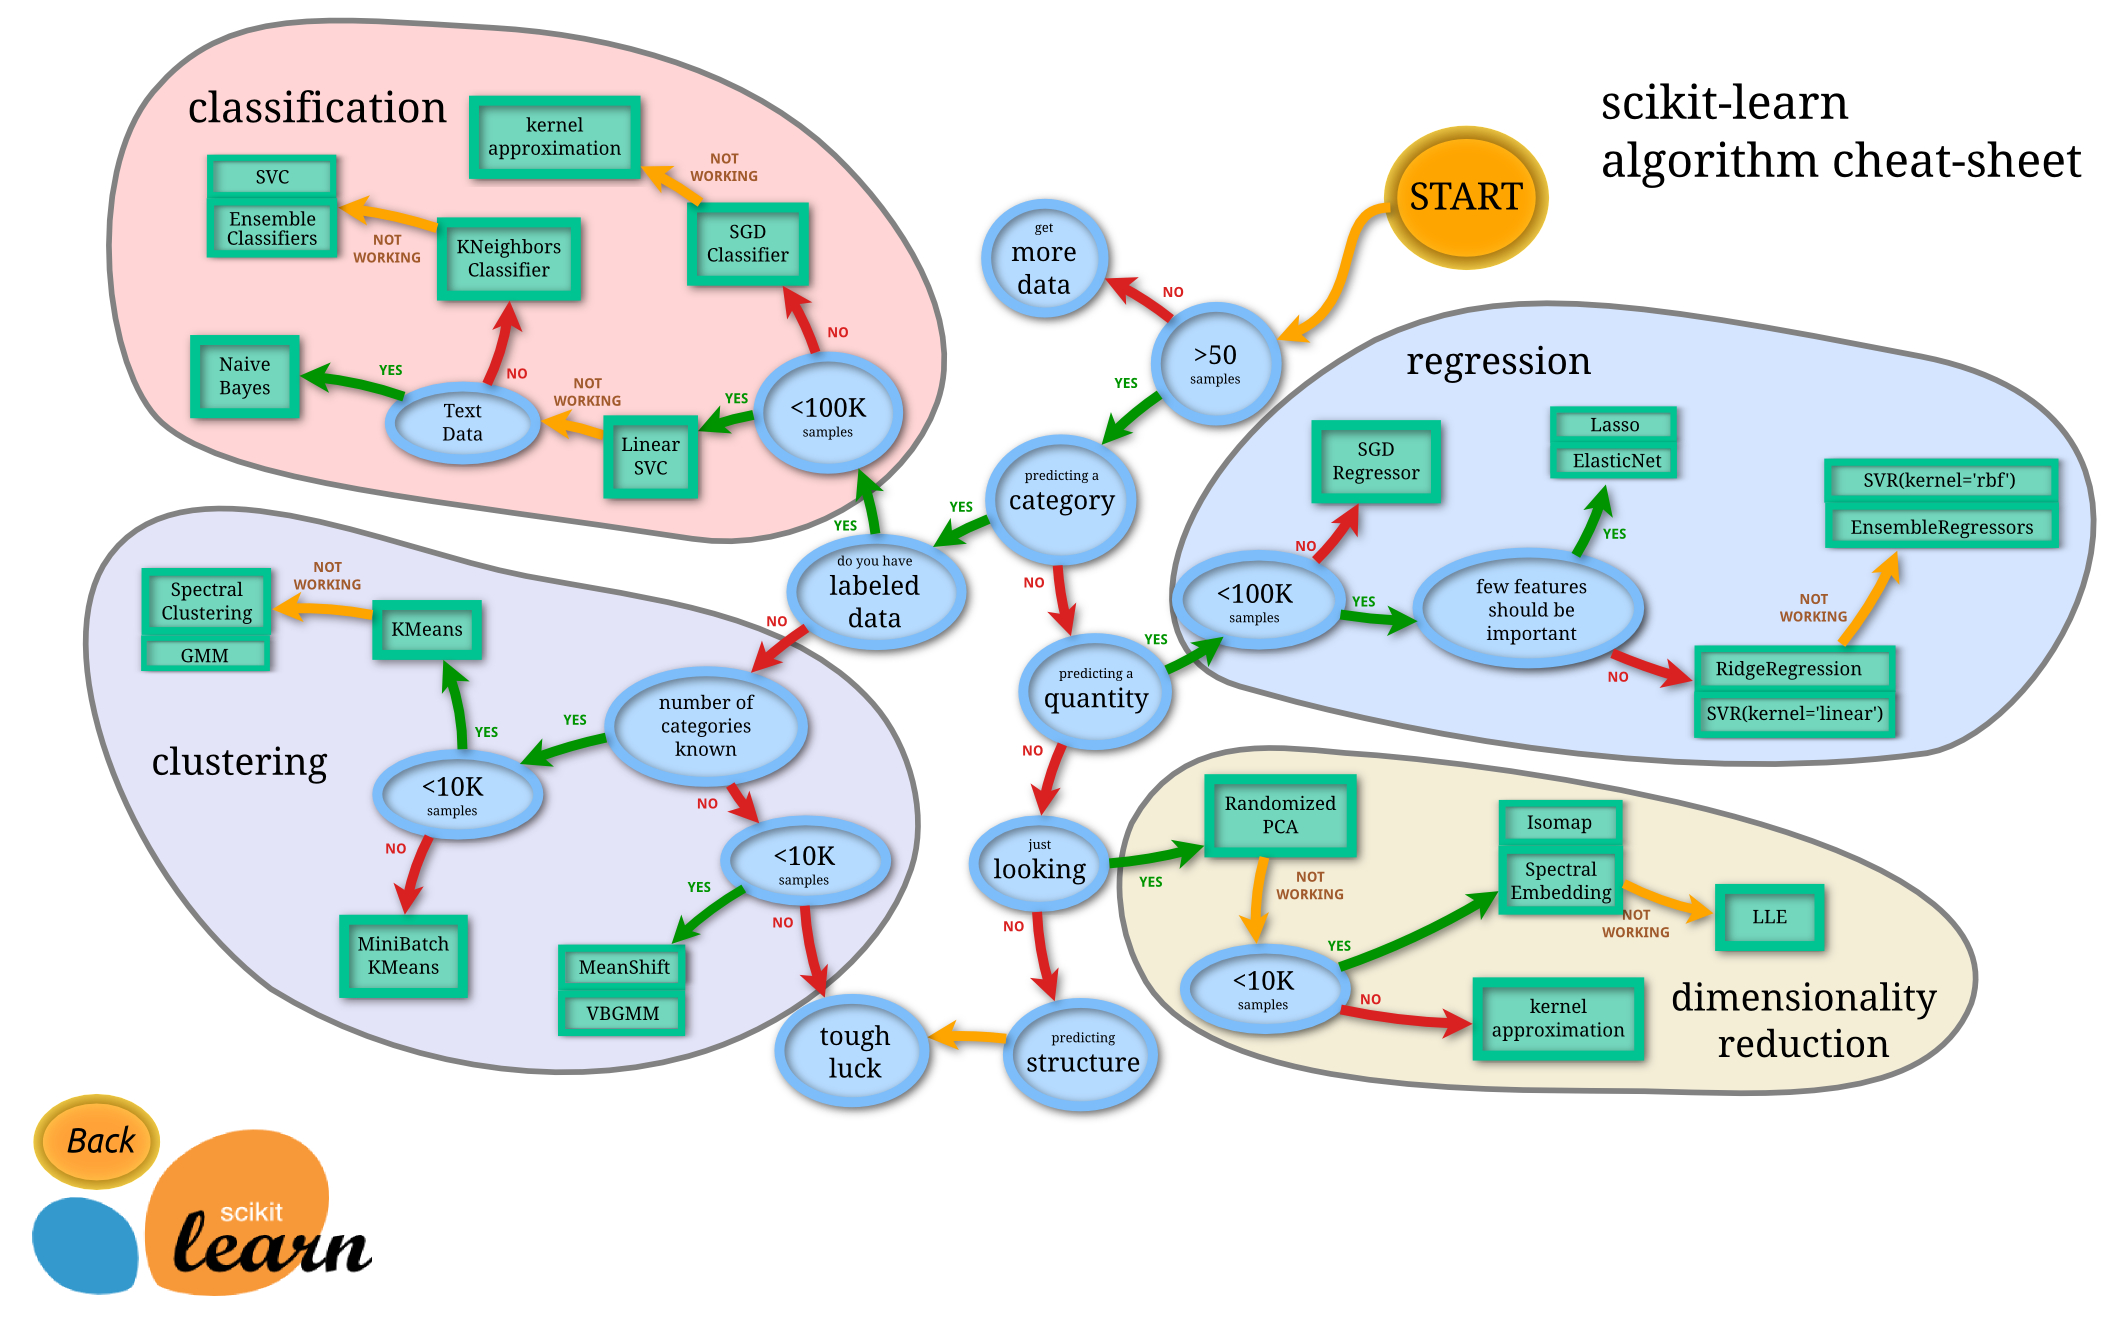

## 0.4 - Tratando desbalanceamento da base

<Axes: ylabel='stroke'>

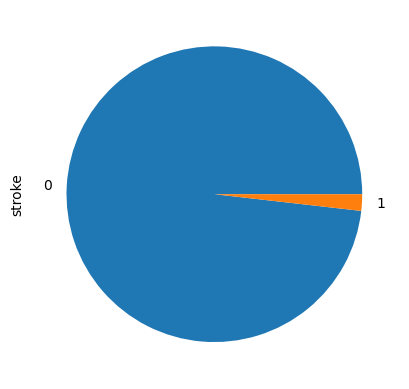

In [23]:
y.value_counts().plot.pie()

Vimos que o dataset se encontra desproporcional em relação aos casos positivos minoritários. Iremos aplicar o random undersampling para reduzir o numero de casos negativos e deixar o dataset balanceado antes da modelagem.

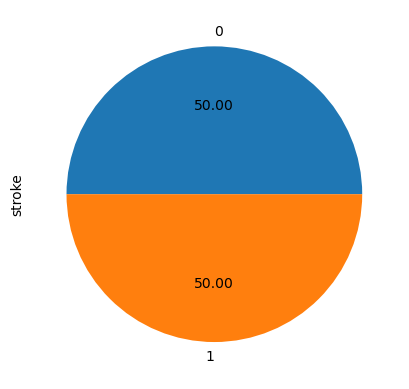

In [26]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)

X_res, y_res = rus.fit_resample(X,y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')

Com a base balanceada, reescrevemos as variaveis de treino e teste.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print(f"train {X_train.shape}")
print(f"test {X_test.shape}")

train (1252, 10)
test (314, 10)


# 1.0 - Modelo de SVM

In [28]:
# Crie um objeto SVM
clf = svm.LinearSVC()

# Ajuste o modelo aos dados de treinamento
clf.fit(X_train, y_train)

/home/jonas/anaconda3/envs/minimal_ds/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [29]:
clf.score(X_test, y_test)

0.535031847133758

In [30]:
# Faça previsões nos dados de teste
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [31]:
# Calcule a precisão (accuracy) do modelo
accuracy = accuracy_score(y_test, y_pred)

print("Acurácia:", accuracy)

Acurácia: 0.535031847133758


In [32]:
recall = recall_score(y_test,y_pred)
recall

0.10975609756097561

In [33]:
f1 = f1_score(y_pred=y_pred,y_true=y_test)
f1

0.1978021978021978

# 2.0 - Modelo de Regressão Logística

In [34]:
# Crie um objeto de regressão logística
logreg = LogisticRegression()

# Ajuste o modelo aos dados de treinamento
logreg.fit(X_train, y_train)

/home/jonas/anaconda3/envs/minimal_ds/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Faça previsões nos dados de teste
y_pred_log = logreg.predict(X_test)

In [36]:
# Calcule a acurácia do modelo
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Acurácia:", accuracy_log)

Acurácia: 0.7898089171974523


In [37]:
recall = recall_score(y_test,y_pred_log)
recall

0.7682926829268293

In [38]:
f1 = f1_score(y_pred=y_pred_log,y_true=y_test)
f1

0.7924528301886793

# 3.0 - Modelo de KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_res, y_res)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# Faça previsões nos dados de teste
y_pred_knn = neigh.predict(X_test)

In [41]:
# Calcule a acurácia do modelo
accuracy_log = accuracy_score(y_test, y_pred_knn)
print("Acurácia:", accuracy_log)

Acurácia: 0.8503184713375797


In [42]:
recall = recall_score(y_test,y_pred_knn)
recall

0.8597560975609756

In [43]:
f1 = f1_score(y_pred=y_pred_knn,y_true=y_test)
f1

0.857142857142857

# 4.0 - Salvando Modelo

Salvamos o modelo que teve o melhor desempenho: KNN

In [44]:
# Salvar o modelo em um arquivo pickle
with open('../models/modelo_KNN.pkl', 'wb') as file:
    pickle.dump(neigh, file)